## Observations and Insights 

#### 3 Observations:
#### 1. One observation I can make is mice on the drug Capomulin had decreases in tumor volumn over time. 
#### 2. Compared to the other drugs Capomulin and Ramican are more effective in decreasing the size of a tumor in the mice.
#### 3. When looking at the relationship between mouse weight and tumor volume there is a strong correlation. The correlation was a 0.84.

In [295]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [296]:
# Checking the number of mice.
num_of_mice = len(combined_mouse_data['Mouse ID'].value_counts())
num_of_mice

249

In [297]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_data = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [298]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data_df = pd.DataFrame(dup_mouse_data)
dup_mouse_data_df

,0
0,g989


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(dup_mouse_data)==False]
#clean_mouse_data_df = combined_mouse_data.drop_duplicates(subset="Mouse ID")
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [300]:
# Checking the number of mice in the clean DataFrame.
num_of_mice2 = len(clean_mouse_data_df['Mouse ID'].value_counts())
num_of_mice2

248

## Summary Statistics

In [301]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_mouse_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mouse_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_mouse_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stddev = clean_mouse_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

mean
median
var
stddev
sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [302]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stat_table = pd.DataFrame({
    "Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stddev, "SEM": sem
})
#sum_stat_table
# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_table2 = clean_mouse_data_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stat_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

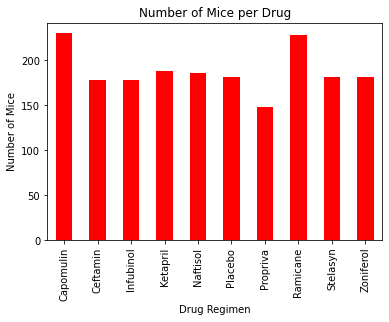

<Figure size 432x288 with 0 Axes>

In [303]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_per_drug = clean_mouse_data_df.groupby("Drug Regimen").count()["Mouse ID"]
pandas_bar = count_per_drug.plot(kind='bar', color='red')
plt.title("Number of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
pandas_bar

plt.show()
plt.tight_layout()
plt.savefig("Images/mice_on_each_drug.png")

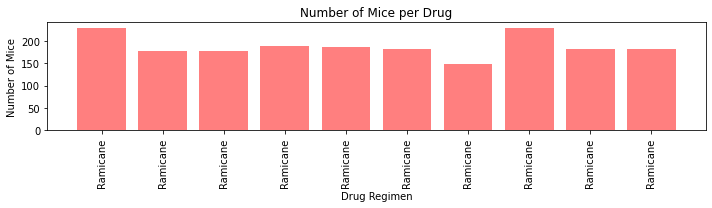

In [304]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count_per_drug))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, count_per_drug, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, clean_mouse_data_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Number of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.savefig("Images/mice_per_drug.png")
plt.show()

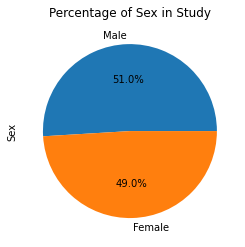

In [416]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = clean_mouse_data_df['Sex'].value_counts()
data.plot(kind="pie", labels=data.index.values, autopct="%1.1f%%")
plt.title('Percentage of Sex in Study')

plt.savefig("Images/Percent_sex_pie.png")

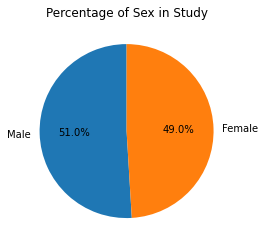

<Figure size 432x288 with 0 Axes>

In [417]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_mouse_data_df['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Percentage of Sex in Study')
plt.show()

plt.savefig("Images/percent_sex_pie2.png")

## Quartiles, Outliers and Boxplots

In [401]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
groupby_drug_df = clean_mouse_data_df.groupby(["Drug Regimen"])
groupby_drug_df.head()

capomulin_df = groupby_drug_df.get_group("Capomulin")
capomulin_df

ramicane_df = groupby_drug_df.get_group("Ramicane")
ramicane_df

infubinol_df = groupby_drug_df.get_group("Infubinol")
infubinol_df

ceftamin_df = groupby_drug_df.get_group("Ceftamin")
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [402]:
# Start by getting the last (greatest) timepoint for each mouse
last_capomulin = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
grouped_capomulin = pd.DataFrame(last_capomulin)
grouped_capomulin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_capomulin_data_df = pd.merge(capomulin_df, grouped_capomulin, on=("Mouse ID", "Timepoint"))
combined_capomulin_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
5,y793,Capomulin,Male,17,17,45,31.896238,2
6,r554,Capomulin,Female,8,17,45,32.377357,3
7,m957,Capomulin,Female,3,19,45,33.329098,1
8,t565,Capomulin,Female,20,17,45,34.455298,0
9,i738,Capomulin,Female,23,20,45,37.311846,2


In [435]:
cap_tumor = capomulin_df["Tumor Volume (mm3)"]

quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volumes is: {lowerq}")
print(f"The upper quartile of the Tumor Volumes is: {upperq}")
print(f"The interquartile range of the Tumor Volumes is: {iqr}")
print(f"The the median of the Tumor Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volumes is: 37.685932865
The upper quartile of the Tumor Volumes is: 45.0
The interquartile range of the Tumor Volumes is: 7.314067135000002
The the median of the Tumor Volumes is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [403]:
# Start by getting the last (greatest) timepoint for each mouse
last_ramicane = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
grouped_ramicane = pd.DataFrame(last_ramicane)
grouped_ramicane
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_ramicane_data_df = pd.merge(ramicane_df, grouped_ramicane, on=("Mouse ID", "Timepoint"))
combined_ramicane_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0
5,j913,Ramicane,Female,4,17,45,31.560470,1
6,n364,Ramicane,Male,4,17,45,31.095335,1
7,c758,Ramicane,Male,9,17,45,33.397653,1
8,a644,Ramicane,Female,7,17,45,32.978522,1
9,i177,Ramicane,Male,10,18,45,33.562402,3


In [436]:
ram_tumor = ramicane_df["Tumor Volume (mm3)"]

quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volumes is: {lowerq}")
print(f"The upper quartile of the Tumor Volumes is: {upperq}")
print(f"The interquartile range of the Tumor Volumes is: {iqr}")
print(f"The the median of the Tumor Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volumes is: 36.67463458499999
The upper quartile of the Tumor Volumes is: 45.0
The interquartile range of the Tumor Volumes is: 8.325365415000007
The the median of the Tumor Volumes is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [404]:
# Start by getting the last (greatest) timepoint for each mouse
last_infubinol = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
grouped_infubinol = pd.DataFrame(last_infubinol)
grouped_infubinol
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_infubinol_data_df = pd.merge(infubinol_df, grouped_infubinol, on=("Mouse ID", "Timepoint"))
combined_infubinol_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2
5,c326,Infubinol,Female,18,25,5,36.321346,0
6,c895,Infubinol,Female,7,29,30,60.969711,2
7,e476,Infubinol,Male,23,26,45,62.435404,1
8,f345,Infubinol,Male,23,26,45,60.918767,1
9,i386,Infubinol,Female,23,29,40,67.289621,4


In [437]:
inf_tumor = infubinol_df["Tumor Volume (mm3)"]

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volumes is: {lowerq}")
print(f"The upper quartile of the Tumor Volumes is: {upperq}")
print(f"The interquartile range of the Tumor Volumes is: {iqr}")
print(f"The the median of the Tumor Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volumes is: 47.3123533
The upper quartile of the Tumor Volumes is: 57.314443967500004
The interquartile range of the Tumor Volumes is: 10.002090667500006
The the median of the Tumor Volumes is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [405]:
# Start by getting the last (greatest) timepoint for each mouse
last_ceftamin = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
grouped_ceftamin = pd.DataFrame(last_ceftamin)
grouped_ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_ceftamin_data_df = pd.merge(ceftamin_df, grouped_ceftamin, on=("Mouse ID", "Timepoint"))
combined_ceftamin_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2
5,h531,Ceftamin,Male,5,27,5,47.784682,0
6,j296,Ceftamin,Female,24,30,45,61.849023,3
7,k210,Ceftamin,Male,15,28,45,68.923185,3
8,l471,Ceftamin,Female,7,28,45,67.748662,1
9,l490,Ceftamin,Male,24,26,30,57.918381,3


In [438]:
cef_tumor = ceftamin_df["Tumor Volume (mm3)"]

quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volumes is: {lowerq}")
print(f"The upper quartile of the Tumor Volumes is: {upperq}")
print(f"The interquartile range of the Tumor Volumes is: {iqr}")
print(f"The the median of the Tumor Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volumes is: 47.208427112500004
The upper quartile of the Tumor Volumes is: 56.801437570000004
The interquartile range of the Tumor Volumes is: 9.5930104575
The the median of the Tumor Volumes is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


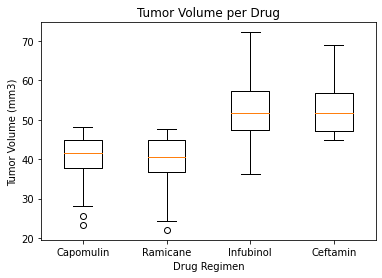

In [442]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Drug')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
plt.savefig("Images/lin_reg_avgvol_vs_weight.png")

## Line and Scatter Plots

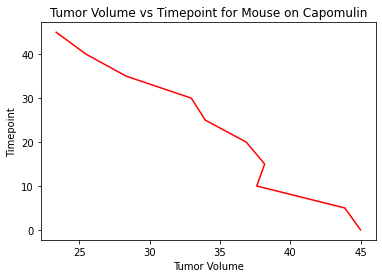

In [408]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = capomulin_df[capomulin_df["Mouse ID"].isin(["s185"])]
s185_df

tumor_vs_time_df = s185_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_vs_time_df

vol = tumor_vs_time_df['Tumor Volume (mm3)']
time = tumor_vs_time_df['Timepoint']

plt.plot(vol, time, color='r')
plt.title("Tumor Volume vs Timepoint for Mouse on Capomulin")
plt.ylabel("Timepoint")
plt.xlabel("Tumor Volume")

plt.savefig("Images/tumor_vs_time_line.png")

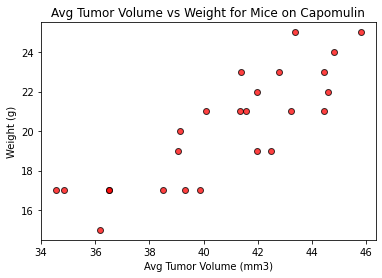

In [409]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg_df = capomulin_df.groupby("Mouse ID").mean()

vol = cap_avg_df['Tumor Volume (mm3)']
weight = cap_avg_df['Weight (g)']

plt.scatter(vol, weight, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Avg Tumor Volume vs Weight for Mice on Capomulin")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

plt.savefig("Images/Avgvol_vs_weight_scat.png")

## Correlation and Regression

In [357]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight2 = cap_avg_df.iloc[:,0]
avgvol = cap_avg_df.iloc[:,2]
correlation = st.pearsonr(weight2,avgvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [372]:
lr_model = st.linregress(vol,weight)
lr_model 

LinregressResult(slope=0.7426941826944178, intercept=-10.148863164111322, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.09924763572688564)

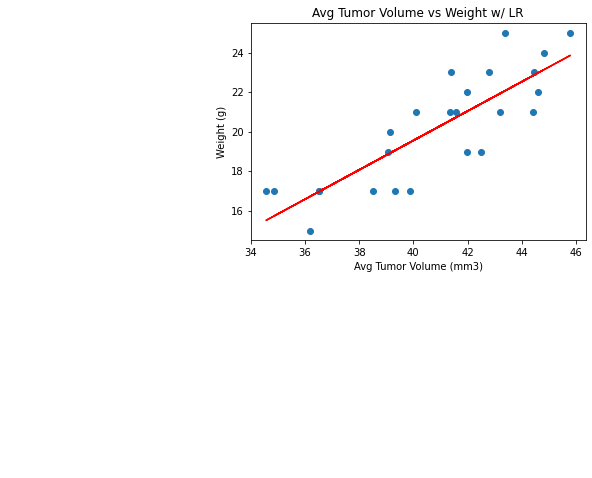

<Figure size 432x288 with 0 Axes>

In [429]:
#linear regreesion model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(vol, weight)
regress_values = vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(vol,weight)
plt.plot(vol,regress_values,"r-")
plt.annotate(line_eq,(25,3),fontsize=15,color="black")
plt.title("Avg Tumor Volume vs Weight w/ LR")
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

plt.savefig("Images/lin_reg_avgvol_vs_weight.png")